# Q1. When is the best time of day, day of the week, and time of year to fly to minimise delays?

Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Opening the datasets with necessary columns and concatenating the two years

In [2]:
dataset_2006 = pd.read_csv("2006.csv", usecols = ['Year','Month','DayofMonth','DayOfWeek','DepTime','DepDelay'])
dataset_2007 = pd.read_csv("2007.csv", usecols = ['Year','Month','DayofMonth','DayOfWeek','DepTime','DepDelay'])
main_dataset = pd.concat([dataset_2006, dataset_2007])
main_dataset

,Year,Month,DayofMonth,DayOfWeek,DepTime,DepDelay
0,2006,1,11,3,743.0,-2.0
1,2006,1,11,3,1053.0,0.0
2,2006,1,11,3,1915.0,0.0
3,2006,1,11,3,1753.0,-2.0
4,2006,1,11,3,824.0,-8.0
...,...,...,...,...,...,...
7453210,2007,12,15,6,1558.0,-7.0
7453211,2007,12,15,6,1902.0,11.0
7453212,2007,12,15,6,1024.0,-1.0
7453213,2007,12,15,6,1353.0,38.0


Learn the shape and object types of our data

In [3]:
main_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14595137 entries, 0 to 7453214
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Year        int64  
 1   Month       int64  
 2   DayofMonth  int64  
 3   DayOfWeek   int64  
 4   DepTime     float64
 5   DepDelay    float64
dtypes: float64(2), int64(4)
memory usage: 779.5 MB


Filtering the dataset to obtain records of only delayed flights

In [4]:
delays = main_dataset[main_dataset['DepDelay'] > 0]

Checking for null vallues

In [5]:
pd.isnull(delays).sum(axis = 0)

Year          0
Month         0
DayofMonth    0
DayOfWeek     0
DepTime       0
DepDelay      0
dtype: int64

Transforming DepTime to an hour format for convenient grouping

In [6]:
delays['DepTime'] = delays['DepTime'] //100
delays['DepTime'] = delays['DepTime'].astype(int)

<ipython-input-6-20c04fb528c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delays['DepTime'] = delays['DepTime'] //100
<ipython-input-6-20c04fb528c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delays['DepTime'] = delays['DepTime'].astype(int)


In [7]:
delays['DepTime'] = delays['DepTime'] *100

<ipython-input-7-7316194d0535>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delays['DepTime'] = delays['DepTime'] *100


Eliminating values that are not in correct 24hour time format (Ex: 2500,2900)

In [8]:
delays = delays[delays['DepTime'] <= 2300]

Adding leading zeros to complete the transformation

In [9]:
delays['DepTime'] = delays['DepTime'].apply(lambda x: '{0:0>4}'.format(x))

In [10]:
delays

,Year,Month,DayofMonth,DayOfWeek,DepTime,DepDelay
6,2006,1,11,3,0800,5.0
10,2006,1,11,3,1800,1.0
15,2006,1,11,3,1300,2.0
16,2006,1,11,3,1700,132.0
18,2006,1,11,3,1100,8.0
...,...,...,...,...,...,...
7453207,2007,12,15,6,1300,6.0
7453208,2007,12,15,6,1600,1.0
7453211,2007,12,15,6,1900,11.0
7453213,2007,12,15,6,1300,38.0


### Q1) i. Best time of day to fly to minimise delays = Between 0600-0700

Grouping the departure delays by hour and obtaining the mean delay across hours

In [11]:
delays_byhour = delays.groupby('DepTime')['DepDelay'].mean()  
y_mean = delays_byhour.mean()

Plotting departure delay hourly

<AxesSubplot:xlabel='DepTime', ylabel='Mean delay in minutes'>

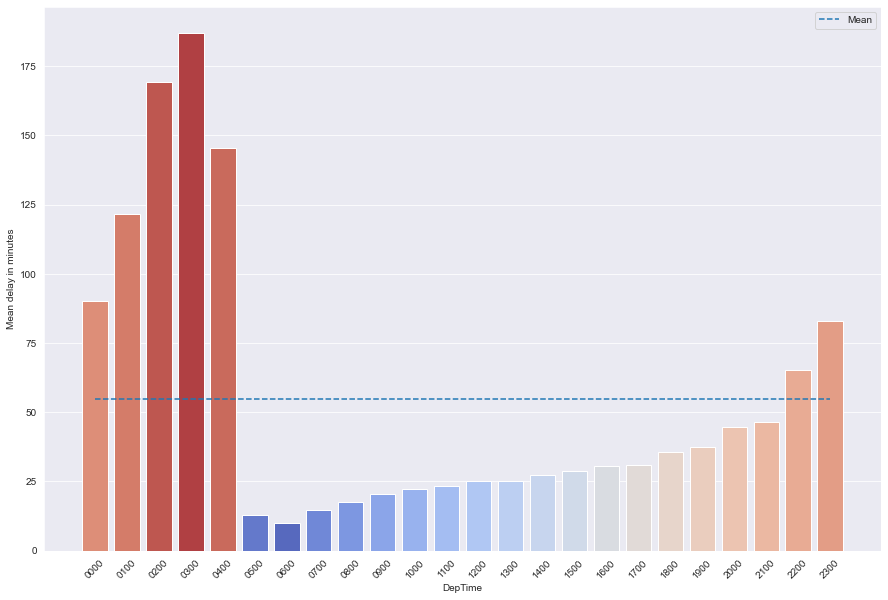

In [12]:
#setting the darker grid style
sns.set_style("darkgrid")

#setting the size of the figure
fig,ax = plt.subplots(figsize = (15, 10))

#rotating the xticks to increase readability
plt.xticks(rotation = 45)

#setting the label for the y axis
ax.set(ylabel = "Mean delay in minutes")

#setting a diverging color palette communicate the degree of delay; redder the bar, higher the delay 
pal = sns.color_palette("coolwarm", len(delays_byhour.values))
rank = delays_byhour.values.argsort().argsort() 

sns.barplot(ax=ax, x = delays_byhour.index, y = delays_byhour.values, palette=np.array(pal)[rank])

#plotting the average line for referencce
sns.lineplot(ax=ax, x = delays_byhour.index,y = y_mean, label='Mean', linestyle='--')

### Q1) ii. Best day of the week to fly to minimise delays = On Saturday

Grouping the departure delays by day and obtaining the mean delay across days

In [13]:
delays_byday = delays.groupby('DayOfWeek')['DepDelay'].mean()
y_mean = delays_byday.mean()

Renaming the index names since dataset is coded -> DayOfWeek 1 (Monday) - 7 (Sunday)

In [14]:
delays_byday.rename({1: 'Monday', 2: 'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}, inplace = True)

Plotting departure delay by day of week

<AxesSubplot:xlabel='DayOfWeek', ylabel='Mean delay in minutes'>

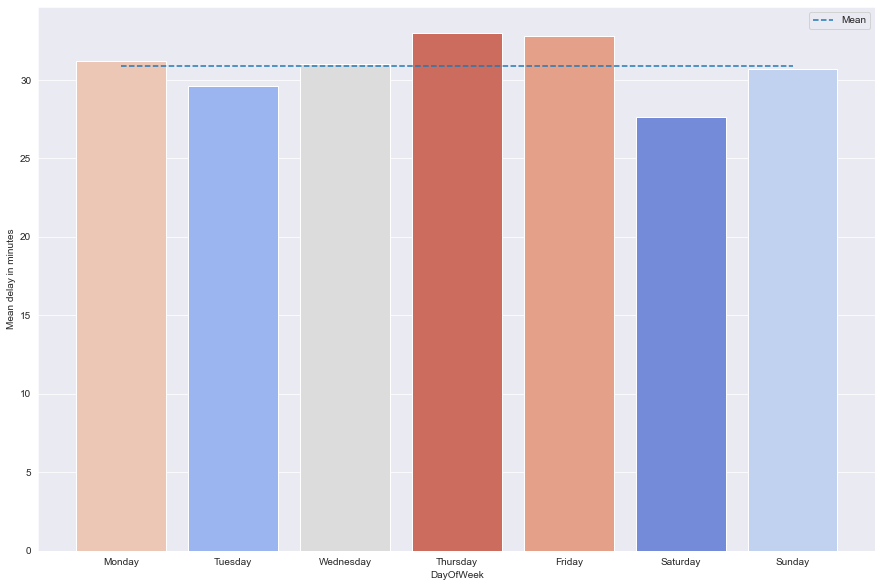

In [15]:
fig,ax = plt.subplots(figsize = (15, 10))


ax.set(ylabel = "Mean delay in minutes")

pal = sns.color_palette("coolwarm", len(delays_byday.values))
rank = delays_byday.values.argsort().argsort() 

sns.barplot(ax=ax, x = delays_byday.index, y = delays_byday.values, palette=np.array(pal)[rank])
sns.lineplot(ax=ax, x = delays_byday.index, y = y_mean, label='Mean', linestyle='--')

### Q1) iii. Best time of year to fly to minimise delays = In November

Grouping the departure delays by month and obtaining the mean delay across months

In [16]:
delays_bymonth = delays.groupby('Month')['DepDelay'].mean()
y_mean = delays_bymonth.mean()

Renaming the index names since dataset is coded -> Month 1 (January) - 7 (December)

In [17]:
delays_bymonth.rename({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}, inplace = True)

Plotting departure delay monthly

<AxesSubplot:xlabel='Month', ylabel='Mean delay in minutes'>

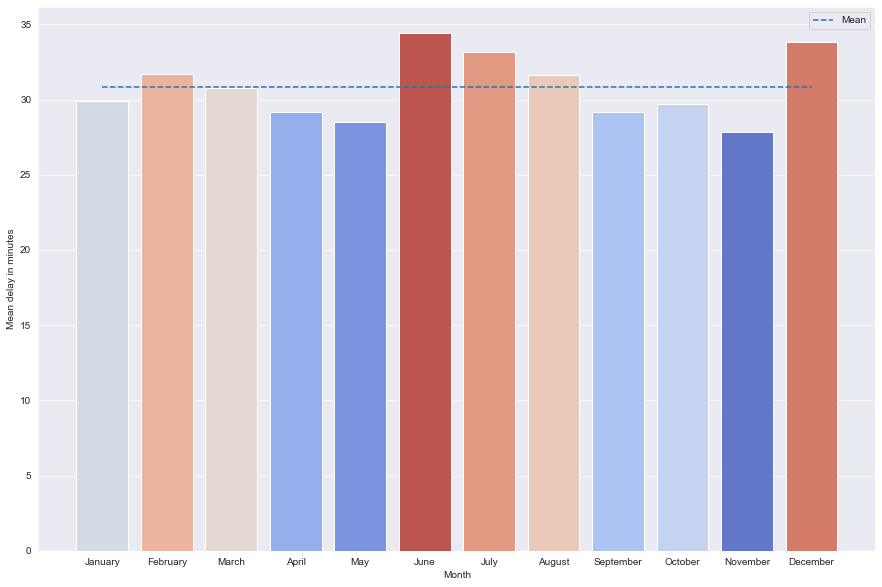

In [18]:
fig,ax = plt.subplots(figsize = (15, 10))

ax.set(ylabel = "Mean delay in minutes")

pal = sns.color_palette("coolwarm", len(delays_bymonth.values))
rank = delays_bymonth.values.argsort().argsort() 

sns.barplot(ax=ax, x = delays_bymonth.index, y = delays_bymonth.values, palette=np.array(pal)[rank])
sns.lineplot(ax=ax, x = delays_bymonth.index, y = y_mean, label='Mean', linestyle='--')